In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

C:\Users\zuhai\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


556


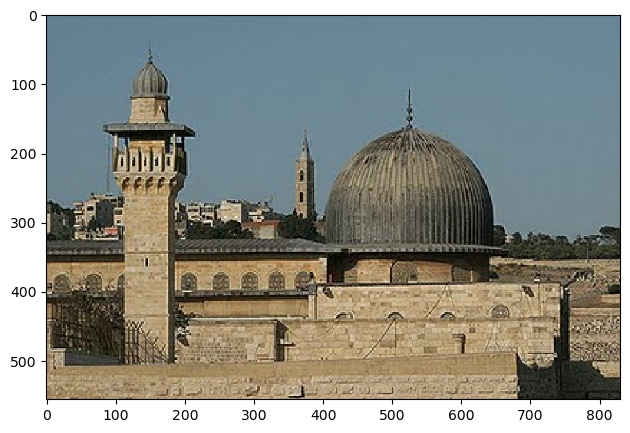

In [2]:
image1 = imread('aqsa.jpeg')
image1
imshow(image1)
print (len(image1))

[[0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 [0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 [0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 ...
 [0.5263451  0.53418824 0.54259686 ... 0.11513216 0.18572039 0.19356353]
 [0.53026667 0.5381098  0.54259686 ... 0.07983804 0.16611255 0.18179882]
 [0.5263451  0.52242353 0.52298902 ... 0.13866157 0.2092498  0.21709294]]


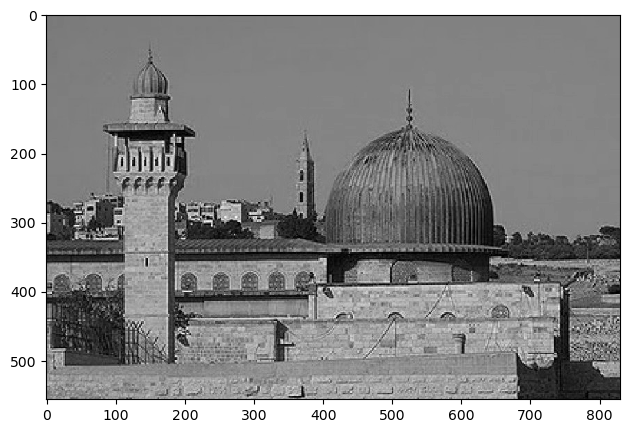

In [3]:
image2 = imread('aqsa.jpeg', as_gray=True)
imshow(image2);
print ((image2))

In [4]:
#Shape of images
print(image1.shape)
print(image2.shape)

(556, 830, 3)
(556, 830)


In [5]:
print(image1.size)
print(image2.size)

1384440
461480


**Feature extraction**

1. Pixel Features

In [6]:
pixel_feat = np.reshape(image2, (556 * 830))
pixel_feat

array([0.47896196, 0.47896196, 0.47896196, ..., 0.13866157, 0.2092498 ,
       0.21709294])

In [7]:
pixel_feat2 = np.reshape(image1, (556 * 830 * 3))
pixel_feat2

array([ 98, 127, 145, ...,  54,  56,  53], dtype=uint8)

2. Edge Features

### Previt kernel

* Prewitt Horizontal Kernel:

[ -1 -1 -1 ] <br>
[  0   0   0 ] <br>
[  1   1   1 ]

In [8]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
# prewitt kernel
pre_hor = prewitt_h(image2)


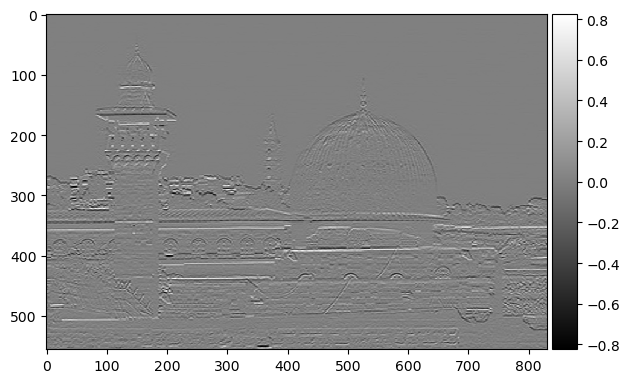

In [9]:
imshow(pre_hor, cmap='gray');

* Prewitt Vertical Kernel:

[ -1  0  1 ] <br>
[ -1  0  1 ] <br>
[ -1  0  1 ]

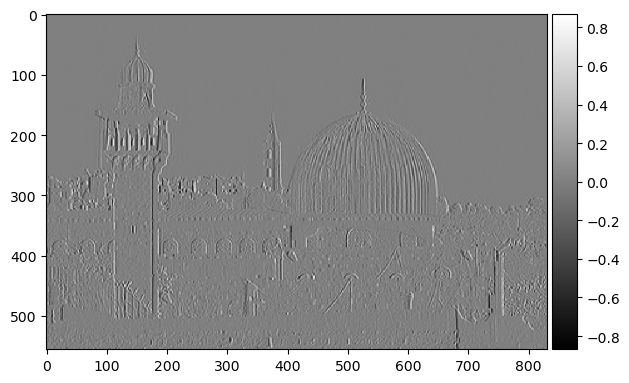

In [10]:
pre_ver = prewitt_v(image2)
imshow(pre_ver, cmap='gray')

* Sobel Operator Vertical

[ -1  0  1 ] <br>
[ -2  0  2 ] <br>
[ -1  0  1 ]

* Sobel Operator Horizontal

[ -1  -2  -1 ] <br>
[  0  0  0 ] <br>
[ 1  2  1 ]

In [11]:
# Sobel Kernel
ed_sobel = filters.sobel(image2)


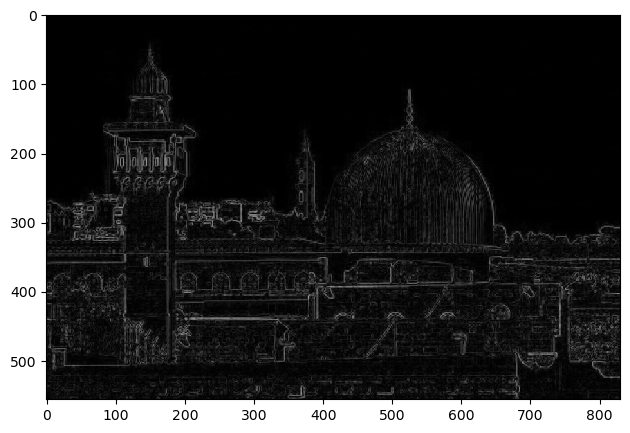

In [12]:
imshow(ed_sobel, cmap='gray');

In [13]:
#canny algorithm
can = feature.canny(image2)
can

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

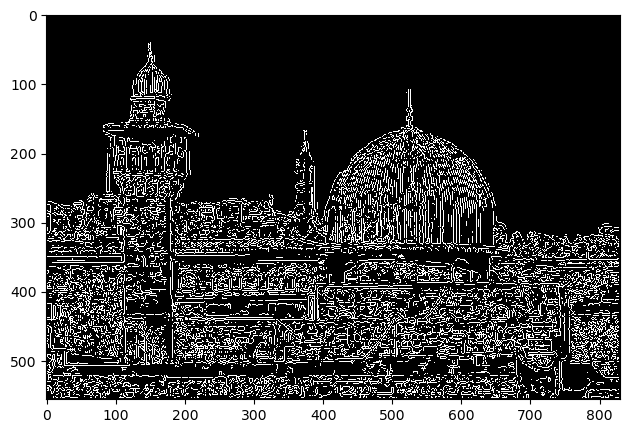

In [14]:
imshow(can, cmap='gray')

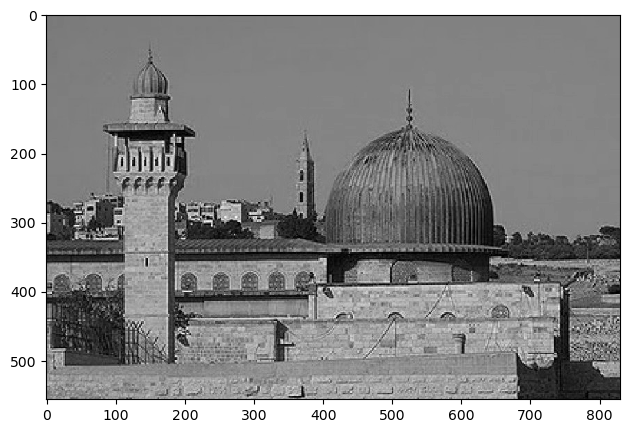

In [15]:
from skimage import color 
grayscale = color.rgb2gray(image1) 

imshow(grayscale)
plt.show()

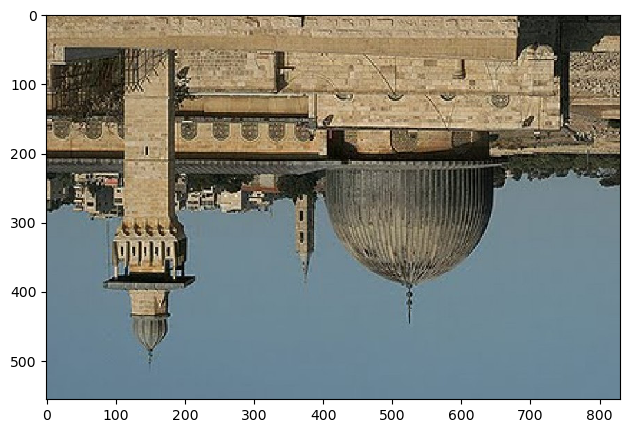

In [16]:
# Flip the image in up direction 
verticalflip = np.flipud(image1)

imshow(verticalflip)
plt.show()

(256, 128, 3)


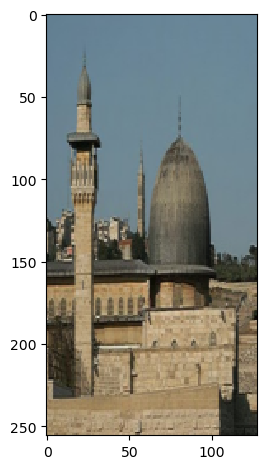

In [17]:
from skimage.transform import resize
resized_img = resize(image1, (256,128)) 
imshow(resized_img) 
print(resized_img.shape)

In [18]:
resized_img=image1

In [19]:
from skimage.feature import hog
from skimage import exposure
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

TypeError: hog() got an unexpected keyword argument 'multichannel'

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
#feature vector
fd

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:

image = cv2.imread('aqsa.jpeg')

cv2.imshow('Image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Display the grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
new_width = 500
new_height = 600

resized_image = cv2.resize(image, (new_width, new_height))

cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('new_image.jpg', resized_image)

### Gausian Kernel

[1 2 1]<br>
[2 4 2]<br>
[1 2 1]

In [ ]:
blurred_image = cv2.GaussianBlur(resized_image, (35,35), 0)

# Display the blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding (adjust the threshold value as needed)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('Binary Thresholded Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Detect faces

In [ ]:
import cv2

image = cv2.imread('kid.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(300, 300))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Image with Faces Detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

bg_subtractor = cv2.createBackgroundSubtractorMOG2()

cap = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    fg_mask = bg_subtractor.apply(frame)
    

    cv2.imshow('Foreground Mask', fg_mask)
    
    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Lab Tasks

1. Read an image and convert it to grey scale. Apply sobel kernel using skimage and from scratch (horizontal).
2. Convert greyscale image to binary by thresholding using opencv and from scratch (100 threshold, 0.3 if image is in float i.e. 0 to 1). 
3. Apply gausian filter kernal to blur an image from scratch and opencv (Use RGB image and 3x3 gausian kernel)
4. Upload your image and detect face in it.
5. Upload a video of yours while moving your head arround and try to detect faces in it, count how many faces are in each frame.
6. Upload a video and apply gausian kernal on it.
7. Upload a video and apply canny edge detector on it (if there are no faces).

In [ ]:
#from google.colab.patches
#import cv2_imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
image=imread("aqsa.jpeg")
imshow(image)

In [ ]:
image_1=imread("aqsa.jpeg",as_gray=True)
imshow(image_1)

In [ ]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
Pre_h=prewitt_h(image_1)
imshow(Pre_h,cmap='gray')

In [ ]:
#SObel Filter

In [ ]:
sobel_image=filters.sobel(image_1)
imshow(sobel_image)

In [ ]:
from skimage import io, color
from scipy.signal import convolve2d





sobel_kernel = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])


sobel_horizontal = convolve2d(image_1, sobel_kernel, mode='same', boundary='symm')

sobel_horizontal = (255 * (sobel_horizontal - sobel_horizontal.min()) / (sobel_horizontal.max() - sobel_horizontal.min())).astype(np.uint8)


io.imshow(sobel_horizontal, cmap='gray')
io.show()


In [ ]:
x=image_1.shape[0]
y=image_1.shape[1]
print(x,y)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import cv2
image_2=imread('aqsa.jpeg')
gray_image = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding (adjust the threshold value as needed)
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('Binary Thresholded Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
blurred_image = cv2.GaussianBlur(image, (35,35), 0)

# Display the blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import cv2

image = cv2.imread('my_photo.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(300, 300))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Image with Faces Detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


video_capture = cv2.VideoCapture('video_1.mp4')  

while True:
    
    ret, frame = video_capture.read()
   
    if not ret:
        break  
   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
   
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
   

    cv2.imshow('Face Detection', frame)
   
    
    num_faces = len(faces)
    print(f'Number of faces: {num_faces}')
   
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()